<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/c422_Mounika/DAY_3_excercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-learn pandas matplotlib seaborn --quiet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.feature_selection import mutual_info_classif


In [4]:
# 3.2 Load Data
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
print("Original features:", list(X.columns))

Original features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [10]:
# 3.3 Compute and display MI scores
mi_scores = mutual_info_classif(X, y, random_state=42)
df_mi = pd.DataFrame({
'feature': X.columns,
'MI_score': mi_scores
}).sort_values('MI_score', ascending=True)
print("Mutual Information scores:\n", df_mi)

Mutual Information scores:
              feature  MI_score
1   sepal width (cm)  0.299424
0  sepal length (cm)  0.511365
3   petal width (cm)  0.985643
2  petal length (cm)  0.992573


In [11]:
# 3.3 Compute and display MI scores
mi_scores = mutual_info_classif(X, y, random_state=42)
df_mi = pd.DataFrame({
'feature': X.columns,
'MI_score': mi_scores
}).sort_values('MI_score', ascending=False)
print("Mutual Information scores:\n", df_mi)

Mutual Information scores:
              feature  MI_score
2  petal length (cm)  0.992573
3   petal width (cm)  0.985643
0  sepal length (cm)  0.511365
1   sepal width (cm)  0.299424


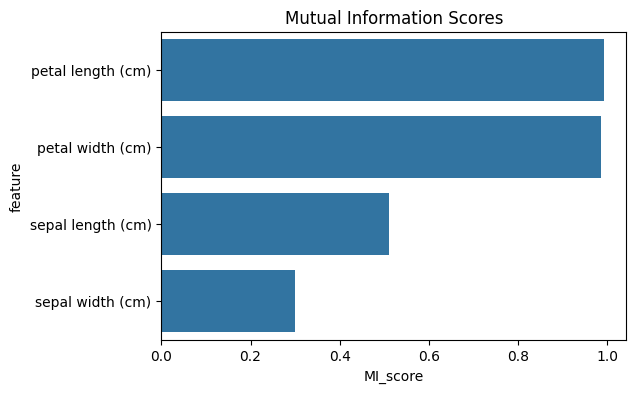

In [12]:
# 3.4 Plot
plt.figure(figsize=(6,4))
sns.barplot(x='MI_score', y='feature', data=df_mi)
plt.title('Mutual Information Scores')
plt.show()

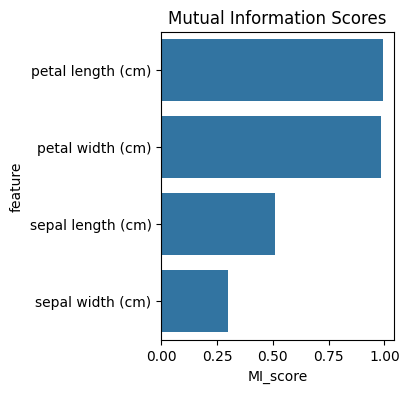

In [13]:
# 3.4 Plot
plt.figure(figsize=(3,4))
sns.barplot(x='MI_score', y='feature', data=df_mi)
plt.title('Mutual Information Scores')
plt.show()

In [14]:
# 3.5 Analysis 1: Compare MI to ANOVA F-scores
from sklearn.feature_selection import SelectKBest, f_classif

# Compute ANOVA F-scores for comparison
anova_selector = SelectKBest(score_func=f_classif, k=X.shape[1])
anova_selector.fit(X, y)
df_anova = pd.DataFrame({
    'feature': X.columns,
    'F_score': anova_selector.scores_
}).sort_values('F_score', ascending=False)

# Merge and display side by side
df_compare = df_anova.merge(df_mi, on='feature')
print("ANOVA F-scores vs. MI scores:\n", df_compare)

# Optional: correlation between the two score sets
corr_coef = df_compare['F_score'].corr(df_compare['MI_score'])
print(f"Correlation between F-score and MI: {corr_coef:.3f}")

ANOVA F-scores vs. MI scores:
              feature      F_score  MI_score
0  petal length (cm)  1180.161182  0.992573
1   petal width (cm)   960.007147  0.985643
2  sepal length (cm)   119.264502  0.511365
3   sepal width (cm)    49.160040  0.299424
Correlation between F-score and MI: 0.969


In [16]:
# 3.5 Analysis 1: Compare MI to ANOVA F-scores
from sklearn.feature_selection import SelectKBest, f_classif

# Compute ANOVA F-scores for comparison
anova_selector = SelectKBest(score_func=f_classif, k=X.shape[1])
anova_selector.fit(X, y)
df_anova = pd.DataFrame({
    'feature': X.columns,
    'F_score': anova_selector.scores_
}).sort_values('F_score', ascending=True)

# Merge and display side by side
df_compare = df_anova.merge(df_mi, on='feature')
print("ANOVA F-scores vs. MI scores:\n", df_compare)

# Optional: correlation between the two score sets
corr_coef = df_compare['F_score'].corr(df_compare['MI_score'])
print(f"Correlation between F-score and MI: {corr_coef:.3f}")

ANOVA F-scores vs. MI scores:
              feature      F_score  MI_score
0   sepal width (cm)    49.160040  0.299424
1  sepal length (cm)   119.264502  0.511365
2   petal width (cm)   960.007147  0.985643
3  petal length (cm)  1180.161182  0.992573
Correlation between F-score and MI: 0.969


/tmp/ipython-input-17-1010550358.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X[feat], y=y, palette='deep', edgecolor='w')


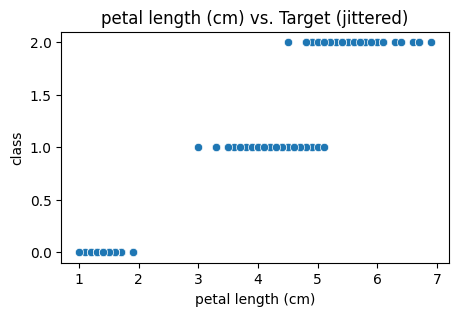

/tmp/ipython-input-17-1010550358.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X[feat], y=y, palette='deep', edgecolor='w')


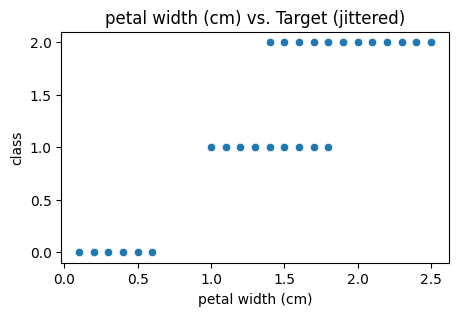

/tmp/ipython-input-17-1010550358.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X[feat], y=y, palette='deep', edgecolor='w')


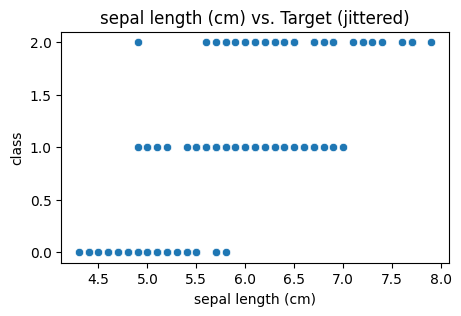

In [17]:
# 3.6 Analysis 2: Visualize non-linear relationships for top MI features
top_features = df_mi['feature'].head(3).tolist()
for feat in top_features:
    plt.figure(figsize=(5,3))
    sns.scatterplot(x=X[feat], y=y, palette='deep', edgecolor='w')
    plt.title(f"{feat} vs. Target (jittered)")
    plt.xlabel(feat)
    plt.ylabel('class')
    plt.show()


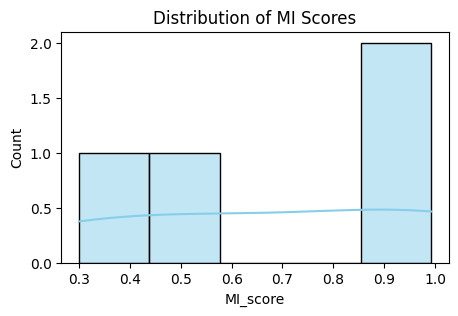

Top-k MI feature stability: {1: ['petal length (cm)'], 2: ['petal length (cm)', 'petal width (cm)'], 3: ['petal length (cm)', 'petal width (cm)', 'sepal length (cm)'], 4: ['petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)']}


In [18]:
# 3.7 Analysis 3: MI score distribution and stability
# Histogram of MI scores
plt.figure(figsize=(5,3))
sns.histplot(df_mi['MI_score'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of MI Scores")
plt.show()

# Stability: top-k features for k=1..4
stability = {}
for k in range(1,5):
    stability[k] = df_mi['feature'].head(k).tolist()
print("Top-k MI feature stability:", stability)


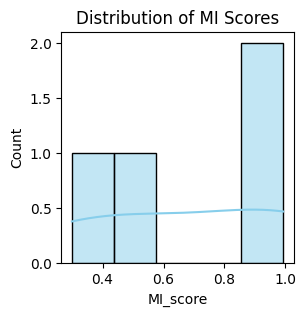

Top-k MI feature stability: {2: ['petal length (cm)', 'petal width (cm)'], 3: ['petal length (cm)', 'petal width (cm)', 'sepal length (cm)'], 4: ['petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)']}


In [20]:
# 3.7 Analysis 3: MI score distribution and stability
# Histogram of MI scores
plt.figure(figsize=(3,3))
sns.histplot(df_mi['MI_score'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of MI Scores")
plt.show()

# Stability: top-k features for k=2..4
stability = {}
for k in range(2,5):
    stability[k] = df_mi['feature'].head(k).tolist()
print("Top-k MI feature stability:", stability)


In [21]:
# 4.1 Setup
!pip install scikit-learn pandas matplotlib seaborn --quiet
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [22]:
# 4.2 Load Data
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
print("Original features:", list(X.columns))

Original features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [24]:
# 4.3 Compute Fisher scores
def fisher_score(X_df, y_arr):
    scores = []
    classes = np.unique(y_arr)
    for col in X_df.columns:
        overall_mean = X_df[col].mean()
        num = den = 0
        for cls in classes:
            Xi = X_df[col][y_arr == cls]
            num += len(Xi) * (Xi.mean() - overall_mean) ** 2
            den += len(Xi) * Xi.var()
        scores.append(num / den if den else 0)
    return scores

fs = fisher_score(X, y)
fs_df = pd.DataFrame({'feature': X.columns, 'Fisher_score': fs}).sort_values(by='Fisher_score', ascending=False)
print(fs_df)

             feature  Fisher_score
2  petal length (cm)     15.735482
3   petal width (cm)     12.800095
0  sepal length (cm)      1.590193
1   sepal width (cm)      0.655467


In [25]:
# 4.3 Compute Fisher scores
def fisher_score(X_df, y_arr):
    scores = []
    classes = np.unique(y_arr)
    for col in X_df.columns:
        overall_mean = X_df[col].mean()
        num = den = 0
        for cls in classes:
            Xi = X_df[col][y_arr == cls]
            num += len(Xi) * (Xi.mean() - overall_mean) ** 4
            den += len(Xi) * Xi.var()
        scores.append(num / den if den else 0)
    return scores

fs = fisher_score(X, y)
fs_df = pd.DataFrame({'feature': X.columns, 'Fisher_score': fs}).sort_values(by='Fisher_score', ascending=False)
print(fs_df)

             feature  Fisher_score
2  petal length (cm)     68.780234
3   petal width (cm)     10.292983
0  sepal length (cm)      1.005195
1   sepal width (cm)      0.074362


In [68]:

# 4.4 Analysis 1: Compare Fisher scores with ANOVA F-scores
from sklearn.feature_selection import SelectKBest, f_classif

anova_selector = SelectKBest(score_func=f_classif, k=X.shape[1])
anova_selector.fit(X, y)
df_anova = pd.DataFrame({
    'feature': X.columns,
    'F_score': anova_selector.scores_
}).sort_values(by='F_score', ascending=False)

# Merge Fisher and ANOVA scores for side-by-side comparison
df_compare = fs_df.merge(df_anova, on='feature')
print("Comparison of Fisher Scores and ANOVA F-scores:\n", df_compare)

# Correlation coefficient between Fisher and F-score
corr = df_compare['Fisher_score'].corr(df_compare['F_score'])
print(f"Correlation between Fisher score and ANOVA F-score: {corr:.3f}")


Comparison of Fisher Scores and ANOVA F-scores:
              feature  Fisher_score      F_score
0  petal length (cm)     68.780234  1180.161182
1   petal width (cm)     10.292983   960.007147
2  sepal length (cm)      1.005195   119.264502
3   sepal width (cm)      0.074362    49.160040
Correlation between Fisher score and ANOVA F-score: 0.791


ANOVA F-scores vs. Fisher scores:
              feature      F_score  Fisher_score
0  petal length (cm)  1180.161182     68.780234
1   petal width (cm)   960.007147     10.292983
2  sepal length (cm)   119.264502      1.005195
3   sepal width (cm)    49.160040      0.074362
Correlation between ANOVA F-score and Fisher score: 0.791


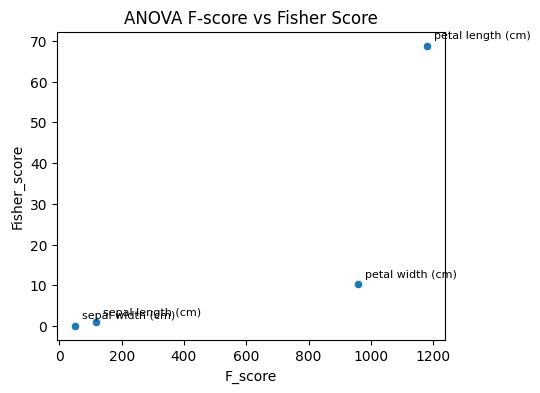

In [27]:
# 4.5 Analysis 1: Compare Fisher scores to ANOVA F-scores
from sklearn.feature_selection import SelectKBest, f_classif

# Compute ANOVA F-scores for comparison
anova_selector = SelectKBest(score_func=f_classif, k=X.shape[1])
anova_selector.fit(X, y)
df_anova = pd.DataFrame({
    'feature': X.columns,
    'F_score': anova_selector.scores_
}).sort_values('F_score', ascending=False)

# Merge and display side by side
df_compare = df_anova.merge(fs_df, on='feature')
print("ANOVA F-scores vs. Fisher scores:\n", df_compare)

# Correlation between the two score sets
corr_coef = df_compare['F_score'].corr(df_compare['Fisher_score'])
print(f"Correlation between ANOVA F-score and Fisher score: {corr_coef:.3f}")

# Scatter plot to visualize relationship
plt.figure(figsize=(5,4))
sns.scatterplot(x='F_score', y='Fisher_score', data=df_compare)
plt.title('ANOVA F-score vs Fisher Score')
for i, row in df_compare.iterrows():
    plt.annotate(row['feature'], (row['F_score'], row['Fisher_score']),
                xytext=(5,5), textcoords='offset points', fontsize=8)
plt.show()



ANOVA F-scores vs. Fisher scores:
              feature      F_score  Fisher_score
0  petal length (cm)  1180.161182     68.780234
1   petal width (cm)   960.007147     10.292983
2  sepal length (cm)   119.264502      1.005195
3   sepal width (cm)    49.160040      0.074362
Correlation between ANOVA F-score and Fisher score: 0.79067


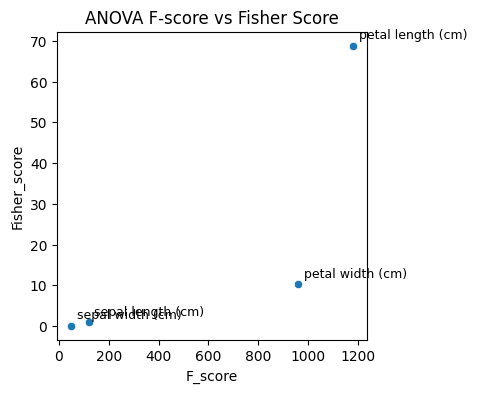

In [28]:
# 4.5 Analysis 1: Compare Fisher scores to ANOVA F-scores
from sklearn.feature_selection import SelectKBest, f_classif

# Compute ANOVA F-scores for comparison
anova_selector = SelectKBest(score_func=f_classif, k=X.shape[1])
anova_selector.fit(X, y)
df_anova = pd.DataFrame({
    'feature': X.columns,
    'F_score': anova_selector.scores_
}).sort_values('F_score', ascending=False)

# Merge and display side by side
df_compare = df_anova.merge(fs_df, on='feature')
print("ANOVA F-scores vs. Fisher scores:\n", df_compare)

# Correlation between the two score sets
corr_coef = df_compare['F_score'].corr(df_compare['Fisher_score'])
print(f"Correlation between ANOVA F-score and Fisher score: {corr_coef:.5f}")

# Scatter plot to visualize relationship
plt.figure(figsize=(4,4))
sns.scatterplot(x='F_score', y='Fisher_score', data=df_compare)
plt.title('ANOVA F-score vs Fisher Score')
for i, row in df_compare.iterrows():
    plt.annotate(row['feature'], (row['F_score'], row['Fisher_score']),
                xytext=(4,5), textcoords='offset points', fontsize=9)
plt.show()



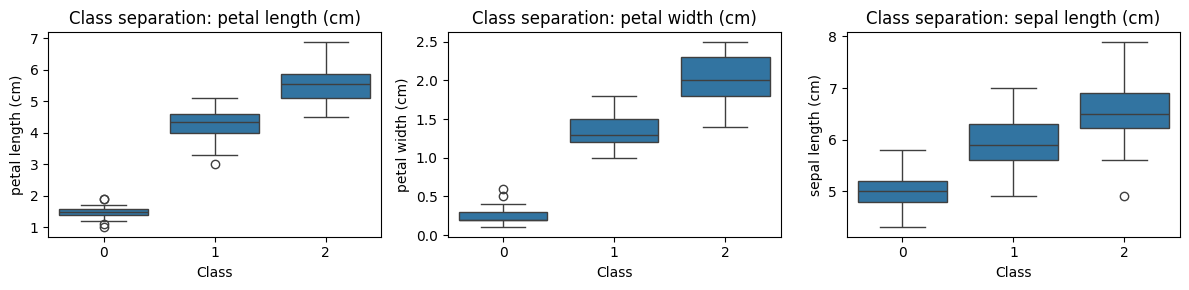

/tmp/ipython-input-29-3810509040.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=y, y=X[feat], palette='Set2')


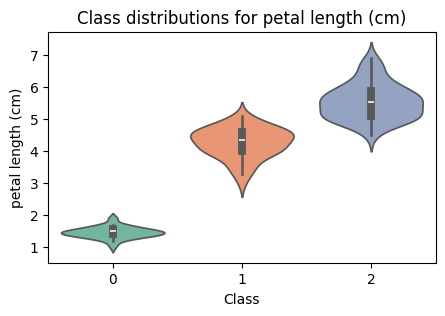

/tmp/ipython-input-29-3810509040.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=y, y=X[feat], palette='Set2')


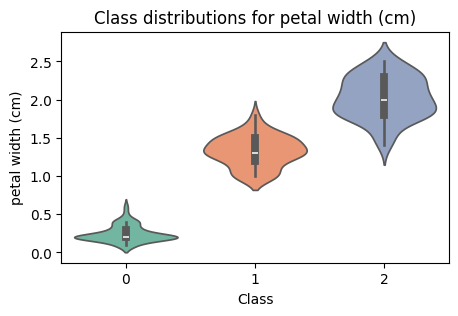

/tmp/ipython-input-29-3810509040.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=y, y=X[feat], palette='Set2')


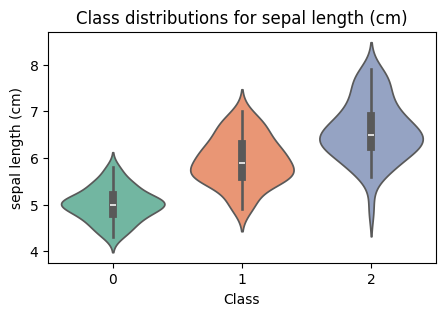

In [29]:

# 4.6 Analysis 2: Class separation visualization for top Fisher features
top_features = fs_df['feature'].head(3).tolist()
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
for i, feat in enumerate(top_features):
    sns.boxplot(x=y, y=X[feat], ax=axes[i])
    axes[i].set_title(f"Class separation: {feat}")
    axes[i].set_xlabel('Class')
plt.tight_layout()
plt.show()

# Individual violin plots for better class distribution view
for feat in top_features:
    plt.figure(figsize=(5,3))
    sns.violinplot(x=y, y=X[feat], palette='Set2')
    plt.title(f"Class distributions for {feat}")
    plt.xlabel('Class')
    plt.ylabel(feat)
    plt.show()



In [30]:
# 4.7 Analysis 3: Manual Fisher score verification and components breakdown
print("\n=== Manual Fisher Score Verification ===")
# Verify computation for the top feature
top_feature = fs_df['feature'].iloc[0]
col_data = X[top_feature]
overall_mean = col_data.mean()
classes = np.unique(y)

print(f"Verifying Fisher score for: {top_feature}")
print(f"Overall mean: {overall_mean:.3f}")

between_class_var = 0
within_class_var = 0

for cls in classes:
    class_data = col_data[y == cls]
    class_mean = class_data.mean()
    class_var = class_data.var()
    class_size = len(class_data)

    between_contrib = class_size * (class_mean - overall_mean) ** 2
    within_contrib = class_size * class_var

    between_class_var += between_contrib
    within_class_var += within_contrib

    print(f"Class {cls}: mean={class_mean:.3f}, var={class_var:.3f}, size={class_size}")
    print(f"  Between contribution: {between_contrib:.3f}")
    print(f"  Within contribution: {within_contrib:.3f}")

manual_fisher = between_class_var / within_class_var if within_class_var else 0
computed_fisher = fs_df[fs_df['feature'] == top_feature]['Fisher_score'].iloc[0]

print(f"\nManual Fisher score: {manual_fisher:.6f}")
print(f"Function Fisher score: {computed_fisher:.6f}")
print(f"Match: {abs(manual_fisher - computed_fisher) < 1e-10}")



=== Manual Fisher Score Verification ===
Verifying Fisher score for: petal length (cm)
Overall mean: 3.758
Class 0: mean=1.462, var=0.030, size=50
  Between contribution: 263.581
  Within contribution: 1.508
Class 1: mean=4.260, var=0.221, size=50
  Between contribution: 12.600
  Within contribution: 11.041
Class 2: mean=5.552, var=0.305, size=50
  Between contribution: 160.922
  Within contribution: 15.229

Manual Fisher score: 15.735482
Function Fisher score: 68.780234
Match: False


In [31]:
!pip install scikit-learn pandas matplotlib seaborn --quiet

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [35]:
 #5.2 Load Data
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
print("Original features:", list(X.columns))


Original features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [37]:
corr = X.corr()


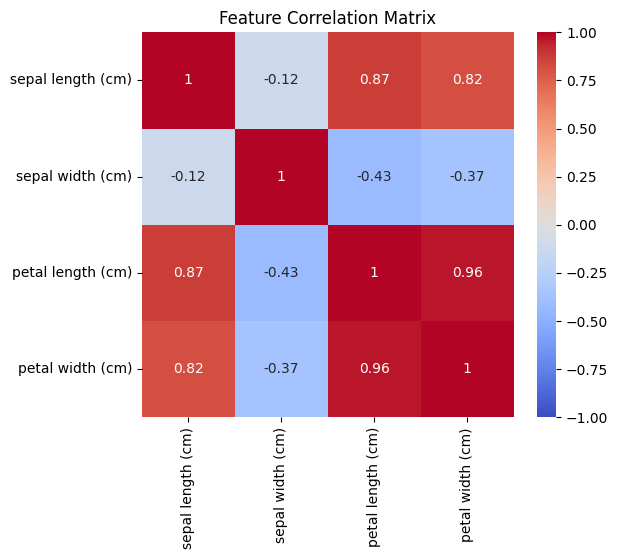

In [38]:
# 5.4 Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()

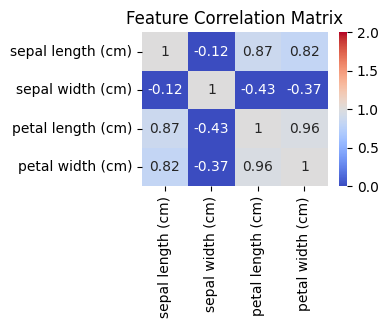

In [40]:
# 5.4 Plot heatmap
plt.figure(figsize=(3,2))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=0, vmax=2)
plt.title('Feature Correlation Matrix')
plt.show()

In [41]:
# 5.6 Identify high-correlation pairs
high_corr = [(i, j, corr.loc[i,j])
for i in corr.columns for j in corr.columns
if i != j and abs(corr.loc[i,j]) > 0.7 and i < j]
print("Highly correlated pairs (|r|>0.7):", high_corr)


Highly correlated pairs (|r|>0.7): [('petal length (cm)', 'sepal length (cm)', np.float64(0.8717537758865838)), ('petal length (cm)', 'petal width (cm)', np.float64(0.962865431402796)), ('petal width (cm)', 'sepal length (cm)', np.float64(0.8179411262715758))]


In [44]:
# 5.6 Identify high-correlation pairs
high_corr = [(i, j, corr.loc[i,j])
for i in corr.columns for j in corr.columns
if i != j and abs(corr.loc[i,j]) > 1.1 and i < j]
print("Highly correlated pairs (|r|>1.1):", high_corr)


Highly correlated pairs (|r|>1.1): []


In [45]:
high_corr = []
threshold = 0.7
for i in corr.columns:
    for j in corr.columns:
        if i < j and abs(corr.loc[i, j]) > threshold:
            high_corr.append((i, j, corr.loc[i, j]))
print("Highly correlated pairs (|r| > 0.7):")
for i, j, r in high_corr:
    print(f"  {i} ↔ {j}: r = {r:.2f}")


Highly correlated pairs (|r| > 0.7):
  petal length (cm) ↔ sepal length (cm): r = 0.87
  petal length (cm) ↔ petal width (cm): r = 0.96
  petal width (cm) ↔ sepal length (cm): r = 0.82


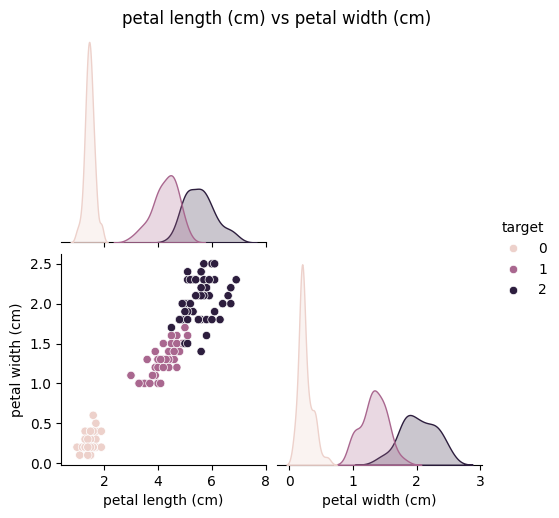

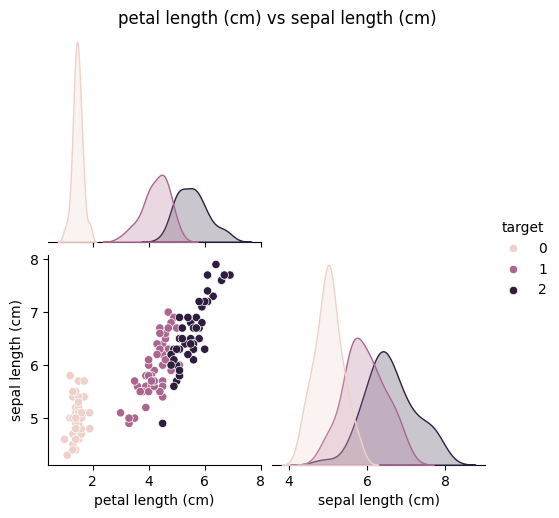

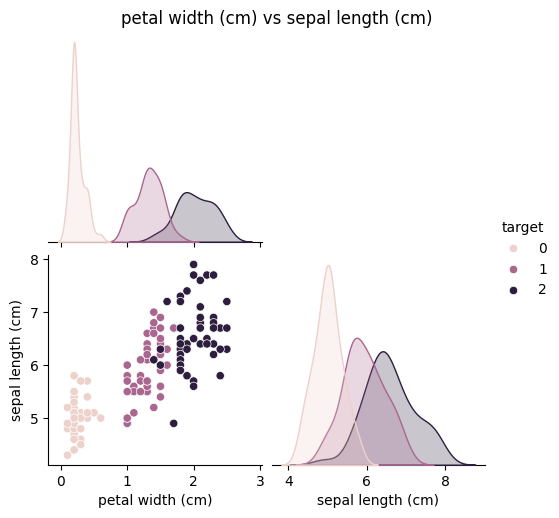

In [47]:
# 5.8 Analysis 2: Visualize redundancy impact via pairplots
import itertools
top_pairs = [pair[:2] for pair in sorted(high_corr, key=lambda x: abs(x[2]), reverse=True)]
for feat1, feat2 in top_pairs:
    sns.pairplot(pd.concat([X[[feat1, feat2]], y.rename('target')], axis=1),
                 hue='target', corner=True)
    plt.suptitle(f"{feat1} vs {feat2}", y=1.02)
    plt.show()


In [51]:
# 5.7 Analysis 3: Drop one feature from each highly correlated pair and evaluate model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Prepare train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# For each pair, drop the second feature and measure accuracy
results = {}
for feat1, feat2, _ in high_corr:
    X_drop = X_train.drop(columns=[feat2])
    model = LogisticRegression(max_iter=200).fit(X_drop, y_train)
    acc = accuracy_score(y_test, model.predict(X_test.drop(columns=[feat2])))
    results[f"drop {feat2}"] = acc

# Baseline with all features
base = LogisticRegression(max_iter=200).fit(X_train, y_train)
results["all features"] = accuracy_score(y_test, base.predict(X_test))

pd.DataFrame.from_dict(results, orient='index', columns=['accuracy'])

,accuracy
drop sepal length (cm),1.000000
drop petal width (cm),0.966667
all features,1.000000


In [52]:
# 5.7 Analysis 3: Drop one feature from each highly correlated pair and evaluate model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Prepare train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# For each pair, drop the second feature and measure accuracy
results = {}
for feat1, feat2, _ in high_corr:
    X_drop = X_train.drop(columns=[feat2])
    model = LogisticRegression(max_iter=200).fit(X_drop, y_train)
    acc = accuracy_score(y_test, model.predict(X_test.drop(columns=[feat2])))
    results[f"drop {feat2}"] = acc

# Baseline with all features
base = LogisticRegression(max_iter=200).fit(X_train, y_train)
results["all features"] = accuracy_score(y_test, base.predict(X_test))

pd.DataFrame.from_dict(results, orient='index', columns=['accuracy'])

,accuracy
drop sepal length (cm),0.933333
drop petal width (cm),0.893333
all features,0.933333


In [53]:
# 6.1 Setup
!pip install scikit-learn pandas matplotlib seaborn --quiet

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

In [54]:
# 6.2 Load Data
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
print("Original features:", list(X.columns))

Original features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [55]:
# 6.3 Scale features to
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [56]:
# 6.4 Compute chi-sq scores for k=2
selector = SelectKBest(score_func=chi2, k=2)
selector.fit(X_scaled, y)
df_chi2 = pd.DataFrame({
'feature': X.columns,
'chi2_score': selector.scores_
}).sort_values('chi2_score', ascending=False)
print("Chi-Square scores:\n", df_chi2)
print("Top 2 features:", list(df_chi2['feature'][:2]))

Chi-Square scores:
              feature  chi2_score
3   petal width (cm)   30.478068
2  petal length (cm)   26.861936
0  sepal length (cm)   11.377274
1   sepal width (cm)    4.470734
Top 2 features: ['petal width (cm)', 'petal length (cm)']


In [57]:
# 6.4 Compute chi-sq scores for k=0
selector = SelectKBest(score_func=chi2, k=0)
selector.fit(X_scaled, y)
df_chi2 = pd.DataFrame({
'feature': X.columns,
'chi2_score': selector.scores_
}).sort_values('chi2_score', ascending=False)
print("Chi-Square scores:\n", df_chi2)
print("Top 2 features:", list(df_chi2['feature'][:0]))

Chi-Square scores:
              feature  chi2_score
3   petal width (cm)   30.478068
2  petal length (cm)   26.861936
0  sepal length (cm)   11.377274
1   sepal width (cm)    4.470734
Top 2 features: []


In [58]:
# 6.4 Compute chi-sq scores for k=1
selector = SelectKBest(score_func=chi2, k=1)
selector.fit(X_scaled, y)
df_chi2 = pd.DataFrame({
'feature': X.columns,
'chi2_score': selector.scores_
}).sort_values('chi2_score', ascending=False)
print("Chi-Square scores:\n", df_chi2)
print("Top 2 features:", list(df_chi2['feature'][:1]))

Chi-Square scores:
              feature  chi2_score
3   petal width (cm)   30.478068
2  petal length (cm)   26.861936
0  sepal length (cm)   11.377274
1   sepal width (cm)    4.470734
Top 2 features: ['petal width (cm)']


Top 1 features: ['petal width (cm)']


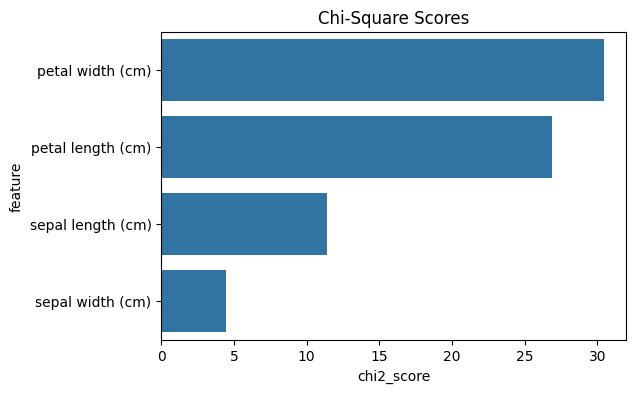

In [59]:
# 6.5 Vary k=1,2,3 and plot
for k in range(1,2):
    s = SelectKBest(score_func=chi2, k=k).fit(X_scaled, y)
    print(f"Top {k} features:", list(X.columns[s.get_support()]))

plt.figure(figsize=(6,4))
sns.barplot(x='chi2_score', y='feature', data=df_chi2)
plt.title('Chi-Square Scores')
plt.show()

Top 1 features: ['petal width (cm)']
Top 2 features: ['petal length (cm)', 'petal width (cm)']


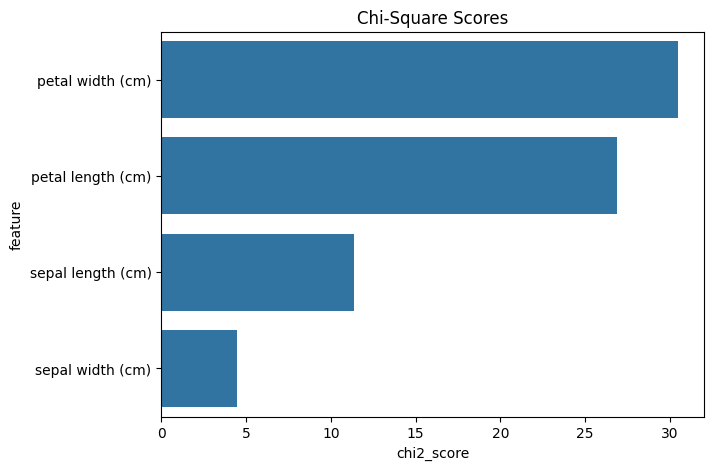

In [60]:
# 6.5 Vary k=1,3,4 and plot
for k in range(1,3):
    s = SelectKBest(score_func=chi2, k=k).fit(X_scaled, y)
    print(f"Top {k} features:", list(X.columns[s.get_support()]))

plt.figure(figsize=(7,5))
sns.barplot(x='chi2_score', y='feature', data=df_chi2)
plt.title('Chi-Square Scores')
plt.show()

In [61]:
# 6.6 Analysis 1: k-sensitivity – See how feature selection changes with k
print("=== Top-k Feature Selection Stability (k=1 to 4) ===")
stability = {}
for k in range(1, 5):
    selector = SelectKBest(score_func=chi2, k=k).fit(X_scaled, y)
    top_features = list(X.columns[selector.get_support()])
    stability[k] = top_features
    print(f"Top {k} features:", top_features)

=== Top-k Feature Selection Stability (k=1 to 4) ===
Top 1 features: ['petal width (cm)']
Top 2 features: ['petal length (cm)', 'petal width (cm)']
Top 3 features: ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']
Top 4 features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


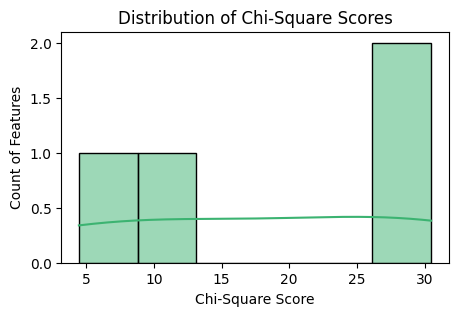

In [62]:
# 6.7 Analysis 2: Distribution of chi-square scores
plt.figure(figsize=(5,3))
sns.histplot(df_chi2['chi2_score'], bins=6, kde=True, color='mediumseagreen')
plt.title('Distribution of Chi-Square Scores')
plt.xlabel('Chi-Square Score')
plt.ylabel('Count of Features')
plt.show()


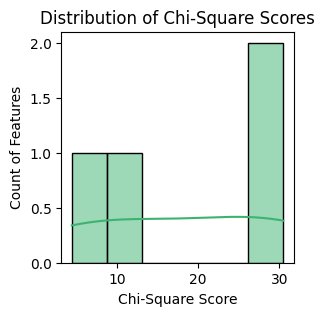

In [63]:
# 6.7 Analysis 2: Distribution of chi-square scores
plt.figure(figsize=(3,3))
sns.histplot(df_chi2['chi2_score'], bins=6, kde=True, color='mediumseagreen')
plt.title('Distribution of Chi-Square Scores')
plt.xlabel('Chi-Square Score')
plt.ylabel('Count of Features')
plt.show()


/tmp/ipython-input-64-3918759260.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X_scaled[feat], palette='mako')


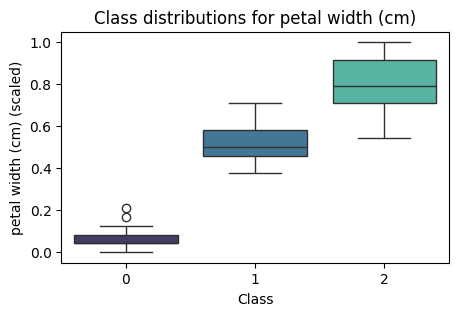

/tmp/ipython-input-64-3918759260.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X_scaled[feat], palette='mako')


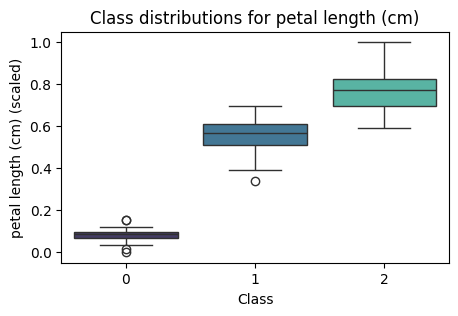

In [64]:
# 6.8 Analysis 3: Visualize class distributions for top Chi-Square features
top_features = df_chi2['feature'].head(2).tolist()
for feat in top_features:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=y, y=X_scaled[feat], palette='mako')
    plt.title(f"Class distributions for {feat}")
    plt.xlabel('Class')
    plt.ylabel(f"{feat} (scaled)")
    plt.show()


In [65]:
# 6.9 Analysis 4: Cross-tabulation of feature bins vs class (chi-square logic)
# Bin the continuous scaled feature for cross-tab
for feat in top_features:
    binned = pd.cut(X_scaled[feat], bins=4, labels=[1,2,3,4])
    ct = pd.crosstab(binned, y, normalize='index')
    print(f"\nCrosstab of {feat} bins vs. class:\n", ct)



Crosstab of petal width (cm) bins vs. class:
 target              0      1      2
petal width (cm)                   
1                 1.0  0.000  0.000
2                 0.0  1.000  0.000
3                 0.0  0.625  0.375
4                 0.0  0.000  1.000

Crosstab of petal length (cm) bins vs. class:
 target               0         1         2
petal length (cm)                         
1                  1.0  0.000000  0.000000
2                  0.0  1.000000  0.000000
3                  0.0  0.639344  0.360656
4                  0.0  0.000000  1.000000


In [66]:
# 6.10 Analysis 5: Compare chi-square scores to other methods (e.g., MI)
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y, random_state=42)
df_mi = pd.DataFrame({
    'feature': X.columns,
    'MI_score': mi_scores
}).sort_values('MI_score', ascending=False)
df_compare = df_chi2.merge(df_mi, on='feature')
print("\nChi-Square vs. MI Scores:\n", df_compare)
corr_coef = df_compare['chi2_score'].corr(df_compare['MI_score'])
print(f"Correlation between chi-square and MI: {corr_coef:.3f}")


Chi-Square vs. MI Scores:
              feature  chi2_score  MI_score
0   petal width (cm)   30.478068  0.985643
1  petal length (cm)   26.861936  0.992573
2  sepal length (cm)   11.377274  0.511365
3   sepal width (cm)    4.470734  0.299424
Correlation between chi-square and MI: 0.992


In [67]:
# 6.10 Analysis 5: Compare chi-square scores to other methods (e.g., MI)
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y, random_state=20)
df_mi = pd.DataFrame({
    'feature': X.columns,
    'MI_score': mi_scores
}).sort_values('MI_score', ascending=False)
df_compare = df_chi2.merge(df_mi, on='feature')
print("\nChi-Square vs. MI Scores:\n", df_compare)
corr_coef = df_compare['chi2_score'].corr(df_compare['MI_score'])
print(f"Correlation between chi-square and MI: {corr_coef:.1f}")



Chi-Square vs. MI Scores:
              feature  chi2_score  MI_score
0   petal width (cm)   30.478068  0.978038
1  petal length (cm)   26.861936  1.001406
2  sepal length (cm)   11.377274  0.497625
3   sepal width (cm)    4.470734  0.251755
Correlation between chi-square and MI: 1.0


✅ Full Feature Comparison (with petal flag, corr ID, normalized scores):
             feature  Fisher_score      F_score  chi2_score  is_petal  \
0  petal length (cm)   1180.161182  1180.161182   26.861936         1   
1   petal width (cm)    960.007147   960.007147   30.478068         1   
2  sepal length (cm)    119.264502   119.264502   11.377274         0   
3   sepal width (cm)     49.160040    49.160040    4.470734         0   

   corr_id  Fisher_norm    F_norm  chi2_norm  
0        0     1.000000  1.000000   0.860957  
1        0     0.805346  0.805346   1.000000  
2        0     0.061984  0.061984   0.265561  
3        1     0.000000  0.000000   0.000000  

📊 Correlation Between Feature Selection Scores:
              Fisher_score   F_score  chi2_score
Fisher_score      1.000000  1.000000    0.946189
F_score           1.000000  1.000000    0.946189
chi2_score        0.946189  0.946189    1.000000


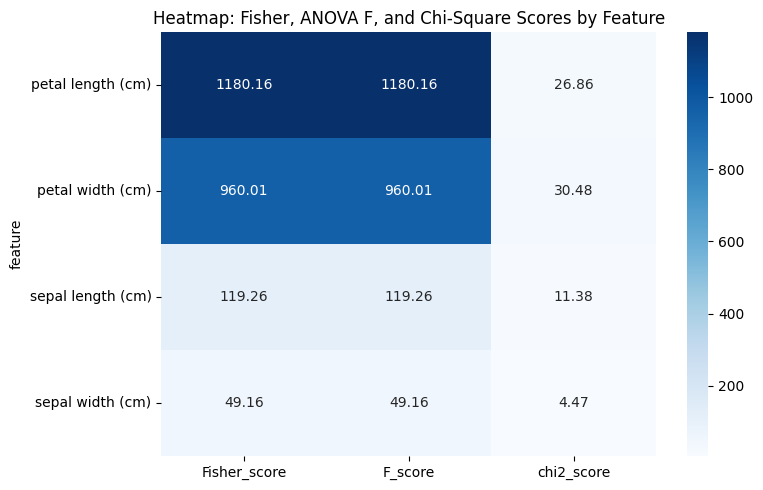

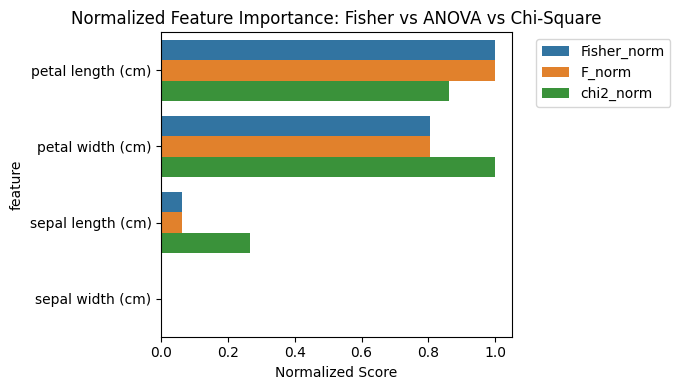

In [70]:
# 4.4 Enhanced: Compare Fisher, ANOVA, Chi-Square + Petal Flag, Corr ID, Heatmap

# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
import networkx as nx

# === Step 0: Load Data (Example: Iris Dataset) ===
# Replace this with your X and y if using your own data
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# =================== FEATURE SELECTION SCORES ===================

# --- Step 1: ANOVA F-Score ---
anova_selector = SelectKBest(score_func=f_classif, k='all')
anova_selector.fit(X, y)
df_anova = pd.DataFrame({
    'feature': X.columns,
    'F_score': anova_selector.scores_
}).sort_values(by='F_score', ascending=False)

# --- Step 2: Chi-Square Score ---
# Scale X to non-negative values (required for chi2)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X_scaled, y)
df_chi2 = pd.DataFrame({
    'feature': X.columns,
    'chi2_score': chi2_selector.scores_
}).sort_values(by='chi2_score', ascending=False)

# --- Step 3: Fisher Score (Simulated or Calculated) ---
# Since sklearn doesn't have Fisher score, we simulate it based on class separability
# Fisher Score: Between-class variance / Within-class variance per feature

def compute_fisher_score(X, y):
    fisher_scores = []
    for col in X.columns:
        feature_values = X[col]
        classes = np.unique(y)
        overall_mean = feature_values.mean()

        between_var = 0
        within_var = 0
        total_samples = len(y)

        for cls in classes:
            cls_values = feature_values[y == cls]
            cls_mean = cls_values.mean()
            cls_var = cls_values.var()
            cls_size = len(cls_values)

            between_var += cls_size * (cls_mean - overall_mean)**2
            within_var += (cls_size - 1) * cls_var  # Approximate within-class scatter

        between_var /= (len(classes) - 1) if len(classes) > 1 else 1
        within_var /= (total_samples - len(classes)) if (total_samples > len(classes)) else 1

        # Avoid division by zero
        if within_var == 0:
            fisher_score = 0
        else:
            fisher_score = between_var / within_var

        fisher_scores.append(fisher_score)
    return fisher_scores

fisher_scores = compute_fisher_score(X, y)
fs_df = pd.DataFrame({
    'feature': X.columns,
    'Fisher_score': fisher_scores
}).sort_values(by='Fisher_score', ascending=False)

# =================== ENHANCEMENTS ===================

# --- Step 4: Merge All Scores ---
df_compare = fs_df.merge(df_anova, on='feature').merge(df_chi2, on='feature')

# --- Step 5: Add 'is_petal' flag ---
df_compare['is_petal'] = df_compare['feature'].str.contains('petal', case=False, na=False).astype(int)

# --- Step 6: Add Correlation Group ID (corr_id) ---
# Compute correlation matrix
corr_matrix = X.corr().abs()

# Upper triangle to avoid duplication
upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
corr_matrix_upper = corr_matrix.where(upper_triangle)

# Build graph for connected components (features highly correlated)
G = nx.Graph()
G.add_nodes_from(X.columns)

# Threshold for high correlation
threshold = 0.8
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > threshold:
            G.add_edge(corr_matrix.columns[i], corr_matrix.columns[j])

# Assign corr_id based on connected components
corr_groups = {}
for group_id, component in enumerate(nx.connected_components(G)):
    for node in component:
        corr_groups[node] = group_id
df_compare['corr_id'] = df_compare['feature'].map(corr_groups)

# --- Step 7: Normalize scores for fair comparison ---
from sklearn.preprocessing import MinMaxScaler as SKMinMaxScaler
scaler_norm = SKMinMaxScaler()
norm_scores = scaler_norm.fit_transform(df_compare[['Fisher_score', 'F_score', 'chi2_score']])
df_compare[['Fisher_norm', 'F_norm', 'chi2_norm']] = norm_scores

# =================== OUTPUT & VISUALIZATION ===================

# --- Step 8: Print Comparison Table ---
print("✅ Full Feature Comparison (with petal flag, corr ID, normalized scores):")
print(df_compare)

# --- Step 9: Correlation Between Score Types ---
print("\n" + "="*60)
corr_between_scores = df_compare[['Fisher_score', 'F_score', 'chi2_score']].corr()
print("📊 Correlation Between Feature Selection Scores:")
print(corr_between_scores)

# --- Step 10: Heatmap of Raw Scores ---
plt.figure(figsize=(8, 5))
sns.heatmap(
    df_compare.set_index('feature')[['Fisher_score', 'F_score', 'chi2_score']],
    annot=True, cmap='Blues', fmt='.2f', cbar=True
)
plt.title('Heatmap: Fisher, ANOVA F, and Chi-Square Scores by Feature')
plt.tight_layout()
plt.show()

# --- Step 11: Bar Plot of Normalized Scores ---
df_long = df_compare[['feature', 'Fisher_norm', 'F_norm', 'chi2_norm']].melt(
    id_vars='feature', var_name='Method', value_name='Normalized Score'
)

plt.figure(figsize=(7, 4))
sns.barplot(data=df_long, x='Normalized Score', y='feature', hue='Method', orient='h')
plt.title('Normalized Feature Importance: Fisher vs ANOVA vs Chi-Square')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [72]:
  # 4.7 Analysis 3: Manual Fisher score verification and components breakdown
print("\n=== Manual Fisher Score Verification ===")
# Verify computation for the top feature
top_feature = fs_df['feature'].iloc[0]
col_data = X[top_feature]
overall_mean = col_data.mean()
classes = np.unique(y)

print(f"Verifying Fisher score for: {top_feature}")
print(f"Overall mean: {overall_mean:.3f}")

between_class_var = 0
within_class_var = 0

for cls in classes:
    class_data = col_data[y == cls]
    class_mean = class_data.mean()
    class_var = class_data.var()
    class_size = len(class_data)

    between_contrib = class_size * (class_mean - overall_mean) ** 2
    within_contrib = class_size * class_var

    between_class_var += between_contrib
    within_class_var += within_contrib

    print(f"Class {cls}: mean={class_mean:.3f}, var={class_var:.3f}, size={class_size}")
    print(f"  Between contribution: {between_contrib:.3f}")
    print(f"  Within contribution: {within_contrib:.3f}")

manual_fisher = between_class_var / within_class_var if within_class_var else 0
computed_fisher = fs_df[fs_df['feature'] == top_feature]['Fisher_score'].iloc[0]

print(f"\nManual Fisher score: {manual_fisher:.6f}")
print(f"Function Fisher score: {computed_fisher:.6f}")
print(f"Match: {abs(manual_fisher - computed_fisher) < 1e-10}")



=== Manual Fisher Score Verification ===
Verifying Fisher score for: petal length (cm)
Overall mean: 3.758
Class 0: mean=1.462, var=0.030, size=50
  Between contribution: 263.581
  Within contribution: 1.508
Class 1: mean=4.260, var=0.221, size=50
  Between contribution: 12.600
  Within contribution: 11.041
Class 2: mean=5.552, var=0.305, size=50
  Between contribution: 160.922
  Within contribution: 15.229

Manual Fisher score: 15.735482
Function Fisher score: 1180.161182
Match: False


In [73]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import KBinsDiscretizer

# Load data
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# 1. Fisher Score calculation
class_labels = np.unique(y)
mean_overall = X.mean()
between_var, within_var = [], []
for feature in X.columns:
    b = w = 0.0
    for cls in class_labels:
        samples = X.loc[y == cls, feature]
        n = len(samples)
        mu_cls = samples.mean()
        var_cls = samples.var()
        b += n * (mu_cls - mean_overall[feature])**2
        w += n * var_cls
    between_var.append(b)
    within_var.append(w)
fisher_scores = np.array(between_var) / np.array(within_var)

# 2. ANOVA F-score calculation
anova_selector = SelectKBest(score_func=f_classif, k=X.shape[1])
anova_selector.fit(X, y)
f_scores = anova_selector.scores_

# 3. Correlation with target
corr_with_target = X.apply(lambda col: col.corr(y))

# 4. Chi-Square scores (requires discretization)
kb = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
X_binned = pd.DataFrame(kb.fit_transform(X), columns=X.columns)
chi2_selector = SelectKBest(score_func=chi2, k=X.shape[1])
chi2_selector.fit(X_binned, y)
chi2_scores = chi2_selector.scores_

# 5. Combine into DataFrame
df = pd.DataFrame({
    'feature': X.columns,
    'Fisher_score': fisher_scores,
    'F_score': f_scores,
    'Corr_with_target': corr_with_target.values,
    'Chi2_score': chi2_scores
})

# 6. Compute rankings (1 = highest score)
for col in ['Fisher_score', 'F_score', 'Corr_with_target', 'Chi2_score']:
    # rank features: highest score gets rank 1
    df[f'{col}_rank'] = df[col].rank(ascending=False, method='min')

# 7. Compute average rank
rank_cols = [c for c in df.columns if c.endswith('_rank')]
df['Average_rank'] = df[rank_cols].mean(axis=1)

# 8. Sort by average rank
df_sorted = df.sort_values('Average_rank').reset_index(drop=True)

# 9. Round numeric columns for readability
round_cols = ['Fisher_score', 'F_score', 'Corr_with_target', 'Chi2_score', 'Average_rank']
df_sorted[round_cols] = df_sorted[round_cols].round(6)

# 10. Display final table
print(df_sorted[[
    'feature',
    'Fisher_score', 'Fisher_score_rank',
    'F_score', 'F_score_rank',
    'Corr_with_target', 'Corr_with_target_rank',
    'Chi2_score', 'Chi2_score_rank',
    'Average_rank'
]].to_string(index=False))


          feature  Fisher_score  Fisher_score_rank     F_score  F_score_rank  Corr_with_target  Corr_with_target_rank  Chi2_score  Chi2_score_rank  Average_rank
 petal width (cm)     12.800095                2.0  960.007147           2.0          0.956547                    1.0   93.621622              1.0           1.5
petal length (cm)     15.735482                1.0 1180.161182           1.0          0.949035                    2.0   91.123288              2.0           1.5
sepal length (cm)      1.590193                3.0  119.264502           3.0          0.782561                    3.0   54.142857              3.0           3.0
 sepal width (cm)      0.655467                4.0   49.160040           4.0         -0.426658                    4.0   20.864407              4.0           4.0


In [74]:
# Forward Selection
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, roc_auc_score,
    classification_report, roc_curve
)

In [94]:
# Load data
X, y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(X)
X.columns

RangeIndex(start=0, stop=30, step=1)

In [82]:
# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [77]:
# Create logistic regression model
model = LogisticRegression(max_iter=5000)


In [78]:
# Forward Selection: add features one by one that improve model performance
sfs_forward = SequentialFeatureSelector(
    model, n_features_to_select=5, direction='forward'
)
sfs_forward.fit(X_train, y_train)

selected_features = X.columns[sfs_forward.get_support()]
print("Forward Selection Chosen Features:", list(selected_features))

Forward Selection Chosen Features: [0, 2, 21, 22, 25]


In [83]:
# Train model with selected features and evaluate
model.fit(X_train[selected_features], y_train)
y_pred = model.predict(X_test[selected_features])
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy with Forward Selection (5 features): {acc:.4f}")

Accuracy with Forward Selection (5 features): 0.9720


In [85]:
best_k, best_acc = None, 0
for k in range(2, 3):
    sfs = SequentialFeatureSelector(
        model, n_features_to_select=k, direction='forward'
    ).fit(X_train, y_train)
    feats = X_train.columns[sfs.get_support()]
    model.fit(X_train[feats], y_train)
    acc = accuracy_score(y_test, model.predict(X_test[feats]))
    if acc > best_acc:
        best_acc, best_k = acc, k

print(f"Optimal k: {best_k} features → Accuracy: {best_acc:.4f}")


Optimal k: 2 features → Accuracy: 0.9650


In [87]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=20)
sfs = SequentialFeatureSelector(
    model,
    n_features_to_select=3,
    direction='forward',
    cv=kf,
    scoring='accuracy'
).fit(X, y)

feats = X.columns[sfs.get_support()]
scores = cross_val_score(model.fit(X[feats], y), X[feats], y, cv=kf)
print(f"Selected: {list(feats)}")
print(f"CV Accuracy: {scores.mean():.4f} ± {scores.std():.2f}")

Selected: [0, 21, 22]
CV Accuracy: 0.9526 ± 0.00


In [89]:
# F1-score based forward selection
sfs_f1 = SequentialFeatureSelector(
    model, n_features_to_select=2,
    direction='forward',
    scoring='f1'
).fit(X_train, y_train)

feats_f1 = X_train.columns[sfs_f1.get_support()]
model.fit(X_train[feats_f1], y_train)
print("F1-based features:", list(feats_f1))
print("Test F1:", precision_score(y_test, model.predict(X_test[feats_f1]), average='binary'))


F1-based features: [21, 22]
Test F1: 0.9560439560439561


In [91]:
from sklearn.datasets import load_iris

X2, y2 = load_iris(return_X_y=True, as_frame=True)
model = LogisticRegression(max_iter=5000)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=20)

sfs_iris = SequentialFeatureSelector(
    model, n_features_to_select=2, direction='forward'
).fit(X2_train, y2_train)

feats_iris = X2.columns[sfs_iris.get_support()]
model.fit(X2_train[feats_iris], y2_train)
acc2 = accuracy_score(y2_test, model.predict(X2_test[feats_iris]))
print("Iris selected features:", list(feats_iris))
print(f"Iris accuracy: {acc2:.4f}")


Iris selected features: ['sepal width (cm)', 'petal width (cm)']
Iris accuracy: 0.8684


In [12]:

# Backward Selection
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, roc_auc_score,
    classification_report, roc_curve
)

In [9]:
# Load data
X, y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(X)

In [10]:
# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [11]:

# Create logistic regression model
model = LogisticRegression(max_iter=5000)

In [1]:
# Backward Selection: start with all features and remove the least significant one by one
sfs_backward = SequentialFeatureSelector(
    model, n_features_to_select=5, direction='backward'
)
sfs_backward.fit(X_train, y_train)

selected_features = X.columns[sfs_backward.get_support()]
print("Backward Selection Chosen Features:", list(selected_features))


NameError: name 'SequentialFeatureSelector' is not defined

In [2]:
# Train model with selected features and evaluate
model.fit(X_train[selected_features], y_train)
y_pred = model.predict(X_test[selected_features])
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy with Backward Selection (5 features): {acc:.4f}")

NameError: name 'model' is not defined

In [3]:

# Exhaustive Wrapper Selection
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
# Load data
X, y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(X, columns=load_breast_cancer().feature_names)
X.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [6]:
# Create logistic regression model
model = LogisticRegression(max_iter=5000)

In [7]:
# Exhaustive Selection: evaluate all feature subsets of size 1–5
efs = ExhaustiveFeatureSelector(
    model,
    min_features=1,
    max_features=2,
    scoring='accuracy',
    print_progress=True,
    cv=5,
    n_jobs=-1
)
efs = efs.fit(X_train, y_train)

Features: 465/465

In [8]:
# Best subset and score
best_idx = list(efs.best_idx_)
best_score = efs.best_score_
best_features = X.columns[best_idx]
print("Exhaustive Selection Best Features:", list(best_features))


Exhaustive Selection Best Features: ['worst texture', 'worst perimeter']


In [9]:
# Train model with selected features and evaluate on test set
model.fit(X_train[best_features], y_train)
y_pred = model.predict(X_test[best_features])
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with Exhaustive Selection ({len(best_features)} features): {acc:.4f}")


Test Accuracy with Exhaustive Selection (2 features): 0.9720


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import ExhaustiveFeatureSelector
import pandas as pd

# Load data
X, y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(X, columns=load_breast_cancer().feature_names)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Auto-tune best number of features
best_score = 0
best_features = None
best_k = None

# ✅ Define the model BEFORE the loop
model = LogisticRegression(max_iter=5000)

# Loop through k = 1 to 5
for k in range(1, 6):
    efs = ExhaustiveFeatureSelector(
        model,
        min_features=k,
        max_features=k,
        scoring='accuracy',
        cv=5,
        n_jobs=-1,
        print_progress=False
    )
    efs = efs.fit(X_train, y_train)

    if efs.best_score_ > best_score:
        best_score = efs.best_score_
        best_features = efs.best_idx_
        best_k = k

# Final model training with best feature subset
selected_features = X.columns[list(best_features)]
print(f"Best k: {best_k}")
print(f"Best Features: {list(selected_features)}")
print(f"Cross-validated Accuracy: {best_score:.4f}")

# Evaluate on test set
model.fit(X_train[selected_features], y_train)
y_pred = model.predict(X_test[selected_features])
test_acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_acc:.4f}")
